<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Lectures/Lec3-CNN_intro.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Convolutional Neural Networks (CNN)
---

This is the lecture note for **CNN**. 

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to CNN. I encourage you to read further about CNN. </p>

Read more:
- [Convolutional neural networks - wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)
- [Conv2D layer - keras](https://keras.io/api/layers/convolution_layers/convolution2d/)
- [CNN for visual recognition - CS231](https://cs231n.github.io/convolutional-networks/)
- [CIFAR10 - Krizhevsky et. al.](https://www.cs.toronto.edu/~kriz/cifar.html)

---

2024-11-24 19:29:56.328189: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 19:29:56.331777: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 19:29:56.340096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732472996.353413  204274 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732472996.357147  204274 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 19:29:56.372631: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

X_train.shape=(50000, 32, 32, 3), X_test.shape=(10000, 32, 32, 3)
y_train.shape=(50000,), y_test.shape=(10000,)


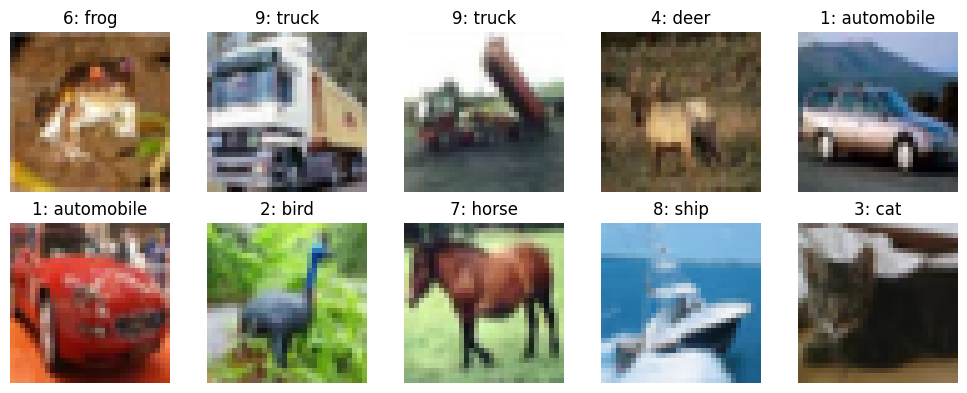

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import os

(X_train, y_train), (X_test, y_test) = load_data()
y_train, y_test = y_train.ravel(), y_test.ravel()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}

print(f"{X_train.shape=}, {X_test.shape=}\n{y_train.shape=}, {y_test.shape=}")

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()


In [2]:
print(f"{X_train.min()=}, {X_train.max()=}")
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

X_train.min()=np.uint8(0), X_train.max()=np.uint8(255)


---
## CNN model 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def CNN_model(learning_rate=0.001, drop_rate=0.5, kernels=[32, 64]):

    print(drop_rate)
    # default learning rate in Adam
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model")

    for number_kernel in kernels:
        conv_layer = Conv2D(
            number_kernel,
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=X_train.shape[1:],
        )

        model.add(conv_layer)
        # defaults to pool_size if None
        model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = CNN_model(.001, .5, [32, 64, 32])

model.summary()


0.5


2024-11-24 19:29:59.363368: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/raphael/ITHS/AI23/AI23-Deep-Learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(
    scaled_X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_split=1 / 5,
)

Epoch 1/100


2024-11-24 19:29:59.696306: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.1694 - loss: 2.1750 - val_acc: 0.3953 - val_loss: 1.6263
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.3977 - loss: 1.6203 - val_acc: 0.4978 - val_loss: 1.3968
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.4875 - loss: 1.4136 - val_acc: 0.5574 - val_loss: 1.2265
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.5265 - loss: 1.2978 - val_acc: 0.5944 - val_loss: 1.1348
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.5552 - loss: 1.2284 - val_acc: 0.6124 - val_loss: 1.0983
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.5775 - loss: 1.1695 - val_acc: 0.6204 - val_loss: 1.0750
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.5934 - loss: 1.1284 - val_acc: 0.6205 - val_loss: 1.0679
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.6073 - loss: 1.0912 - val_acc: 0.6494 - val_loss: 0.9937
Epoch 9/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7

In [5]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.234275,1.999995,0.3953,1.626321
1,0.423300,1.560426,0.4978,1.396769
2,0.495750,1.385462,0.5574,1.226523
3,0.527650,1.291925,0.5944,1.134793
4,0.560725,1.218284,0.6124,1.098327


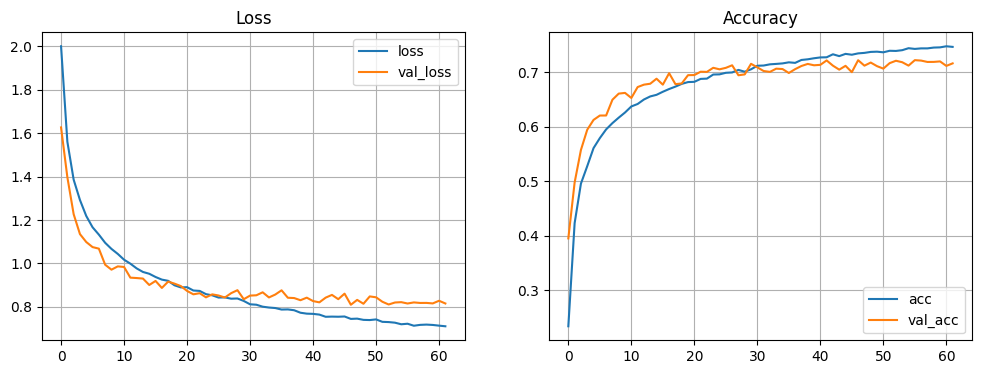

In [6]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

## Hyperparameter tuning 
We can tune several parameters, e.g.
- dropout rate
- learning rate
- different network configurations

For simplicity we only tune dropout rate here

In [7]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)


def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(
        scaled_X_train,
        y_train,
        validation_split=1 / 6,
        epochs=15,  # small epochs to make training faster
        callbacks=[early_stopper],
    )
    metrics = pd.DataFrame(model.history.history)

    val_acc = metrics["val_acc"].iloc[-1]
    return val_acc


In [8]:
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    # because of floating point precision
    drop_rate = np.round(drop_rate,1) 
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)


0.1


/home/raphael/ITHS/AI23/AI23-Deep-Learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


2024-11-24 19:38:07.616272: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 511991808 exceeds 10% of free system memory.


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.4325 - loss: 1.5936 - val_acc: 0.6340 - val_loss: 1.0674
Epoch 2/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.6351 - loss: 1.0363 - val_acc: 0.6529 - val_loss: 0.9894
Epoch 3/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7022 - loss: 0.8588 - val_acc: 0.6886 - val_loss: 0.9080
Epoch 4/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7513 - loss: 0.7191 - val_acc: 0.6821 - val_loss: 0.9319
Epoch 5/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7909 - loss: 0.6004 - val_acc: 0.7016 - val_loss: 0.8909
Epoch 6/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.8289 - loss: 0.4883 - val_acc: 0.7111 - val_loss: 0.9297
Epoch 7/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.8677 - loss: 0.3929 - val_acc: 0.7006 - val_loss: 0.9867
Epoch 8/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.8846 - loss: 0.3302 - val_acc: 0.6961 - val_loss: 1.0656
Epoch 9/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7m

2024-11-24 19:39:43.174831: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 511991808 exceeds 10% of free system memory.


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.4038 - loss: 1.6664 - val_acc: 0.6140 - val_loss: 1.1152
Epoch 2/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.6161 - loss: 1.0861 - val_acc: 0.6680 - val_loss: 0.9618
Epoch 3/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.6869 - loss: 0.9049 - val_acc: 0.6665 - val_loss: 0.9593
Epoch 4/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7282 - loss: 0.7745 - val_acc: 0.7117 - val_loss: 0.8535
Epoch 5/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7671 - loss: 0.6661 - val_acc: 0.6874 - val_loss: 0.9062
Epoch 6/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.8016 - loss: 0.5590 - val_acc: 0.7118 - val_loss: 0.8871
Epoch 7/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.8352 - loss: 0.4714 - val_acc: 0.7291 - val_loss: 0.8531
Epoch 8/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.8547 - loss: 0.4117 - val_acc: 0.7126 - val_loss: 0.9343
Epoch 9/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11

2024-11-24 19:41:41.047389: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 511991808 exceeds 10% of free system memory.


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.3905 - loss: 1.7170 - val_acc: 0.5853 - val_loss: 1.1851
Epoch 2/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.6064 - loss: 1.1063 - val_acc: 0.6357 - val_loss: 1.0258
Epoch 3/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.6714 - loss: 0.9399 - val_acc: 0.6963 - val_loss: 0.8811
Epoch 4/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7174 - loss: 0.8142 - val_acc: 0.6920 - val_loss: 0.8971
Epoch 5/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7476 - loss: 0.7233 - val_acc: 0.7131 - val_loss: 0.8367
Epoch 6/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7814 - loss: 0.6268 - val_acc: 0.7210 - val_loss: 0.8219
Epoch 7/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.8058 - loss: 0.5533 - val_acc: 0.7111 - val_loss: 0.8691
Epoch 8/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.8323 - loss: 0.4844 - val_acc: 0.7259 - val_loss: 0.8410
Epoch 9/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms

2024-11-24 19:43:26.510608: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 511991808 exceeds 10% of free system memory.


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.4004 - loss: 1.6441 - val_acc: 0.6010 - val_loss: 1.1408
Epoch 2/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.6000 - loss: 1.1181 - val_acc: 0.6598 - val_loss: 0.9741
Epoch 3/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.6658 - loss: 0.9510 - val_acc: 0.6465 - val_loss: 1.0113
Epoch 4/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7061 - loss: 0.8352 - val_acc: 0.7034 - val_loss: 0.8543
Epoch 5/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7448 - loss: 0.7238 - val_acc: 0.7185 - val_loss: 0.8225
0.5
Epoch 1/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.3763 - loss: 1.7212 - val_acc: 0.5728 - val_loss: 1.2167
Epoch 2/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.5639 - loss: 1.2216 - val_acc: 0.6156 - val_loss: 1.0768
Epoch 3/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.6284 - loss: 1.0616 - val_acc: 0.6477 - val_loss: 0.9977
Epoch 4/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s

<Axes: title={'center': 'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

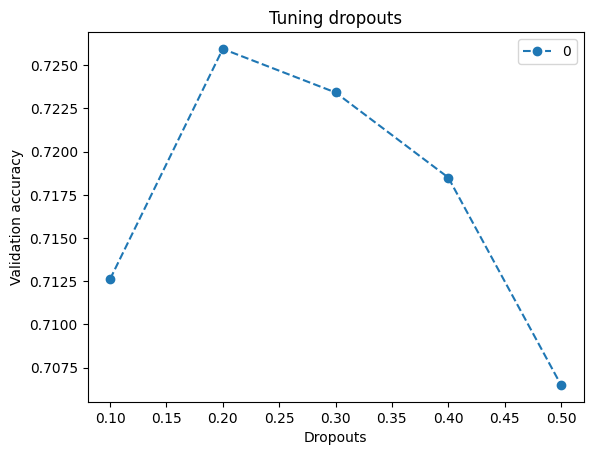

In [9]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)


---
## Train and evaluate on chosen model

In [12]:
# note that we can't use early stopping here as we will train on all training data and no validation
# don't use test data as validation data here 

model_final = CNN_model(drop_rate = .2)

model_final.fit(scaled_X_train, y_train, epochs = 20)



0.2


/home/raphael/ITHS/AI23/AI23-Deep-Learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.4465 - loss: 1.5319
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.6475 - loss: 1.0073
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.7095 - loss: 0.8306
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.7523 - loss: 0.7113
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.7909 - loss: 0.6084
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.8159 - loss: 0.5194
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.8444 - loss: 0.4421
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.8667 - loss: 0.3745
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.8889 - loss: 0.3153
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.9024 - loss: 0.2799
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.9120 - loss: 0.2499
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.9234 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1000
           1       0.95      0.71      0.81      1000
           2       0.71      0.48      0.58      1000
           3       0.48      0.61      0.54      1000
           4       0.60      0.73      0.66      1000
           5       0.71      0.52      0.60      1000
           6       0.70      0.83      0.76      1000
           7       0.74      0.76      0.75      1000
           8       0.88      0.78      0.83      1000
           9       0.71      0.89      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



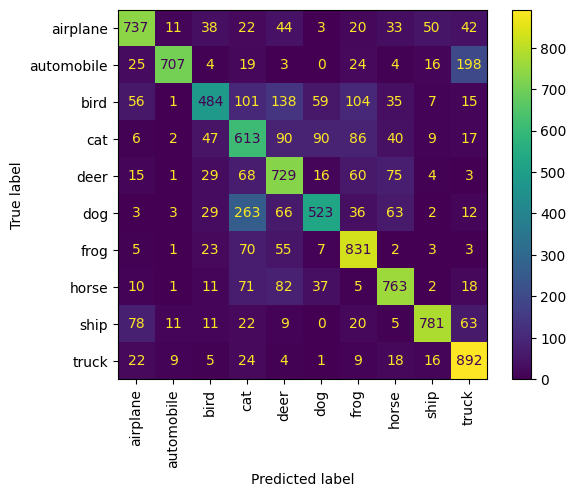

In [13]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(scaled_X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90);

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
